<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 8

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">Testes de eletromigração em linhas de cobre produziram os seguintes dados de falhas em horas:</div>

|       |$1x10^6 (\frac{A}{cm^2})$  |$2x10^6 (\frac{A}{cm^2})$ |$3x10^6 (\frac{A}{cm^2})$ |
|:-:	|:-:	                    |:-:	                   |:-:	                      |
|280°C|-|20.3|-|
|300°C|20|10|6.7|
|320°C|-|5|-|


<br><div style="text-align: justify">Determine o expoente n para a densidade de corrente e a energia de ativação Q para este 
mecanismo de falha.
</div>

---

In [18]:
import notebook_importer
from modules import IE325
import numpy as np
import matplotlib.pyplot as plt

Tcte_hours = [20, 10, 6.7]
Tcte_CurrentDensity = [1e6, 2e6, 3e6]
Tcte = 300 + 273

Scte_hours = [20.3, 10, 5]
Scte_Temp = [280+273, 300+273, 320+273]
Scte = 2e6

TF_PL = IE325.TF_PowerLaw('all', Tcte_hours, Tcte_CurrentDensity, Tcte,
                         Scte_hours, Scte_Temp, Scte)

Equação característica para o tempo de falha, em função da temperatura e do stress aplicado:


** $TF(T,\xi) = A_o.(\xi)^{-n}.exp(\frac {Q}{kT})$ **

---
##### Expoente n

Para uma temperatura T constante, pode-se linearizar:

$TF(T,\xi) = c.(\xi)^{-n}  \Rightarrow   log(TF(T_{cte},\xi)) = log(c) - n .log(\xi)  $

(onde $c = A_o.exp(\frac {Q}{kT})$)

E encontrar o valor de ** *n* **

In [19]:
print(TF_PL.n)

0.995949005002


---
##### Energia de Ativação Q

Já para um stress $\xi$ T constante, pode-se linearizar:

$TF(T,\xi) = c.exp(\frac {Q}{kT})  \Rightarrow   ln(TF(T,\xi_{cte})) = ln(c) + \frac {Q}{k}.\overline{T}  $

onde $\overline{T} = T^{-1}$ e $c = A_o.(\xi)^{-n}$

E encontrar o valor de ** *Q* **.

In [20]:
print(TF_PL.Q)

9.89573678658


---
##### Constante Ao e lei de regimento de potência do Tempo de Falha
Tendo esses dois valores, encontra-se a constante ** *Ao* ** da lei e o regimento do Tempo de Falha (TF - Time to Failure) pode ser escrito.

In [21]:
print("Lei de Regimento do Tempo de Falha:")
print(TF_PL.Law())

Lei de Regimento do Tempo de Falha:
TF(csi, T) = 3.735e-02.(csi)^(-9.959e-01).exp(1.148e+04/T)


---

##### Tempo de Falha - Variação do stress em diferentes temperaturas

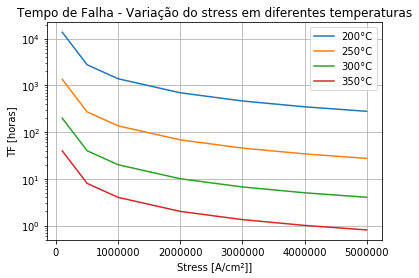

In [26]:
stress = [0.1e6,0.5e6,1e6,2e6,3e6,4e6,5e6]

# ----- Plot    
plt.plot(stress,TF_PL.Find_TF(stress,200+273),
         stress,TF_PL.Find_TF(stress,250+273), 
         stress,TF_PL.Find_TF(stress,300+273), 
         stress,TF_PL.Find_TF(stress,350+273))
plt.title('Tempo de Falha - Variação do stress em diferentes temperaturas')
plt.legend(['200°C','250°C','300°C','350°C'])
plt.xlabel('Stress [A/cm²]]')
plt.ylabel('TF [horas]')
plt.yscale('log')
plt.grid()
fig = plt.gcf()
plt.show()

---

##### Tempo de Falha - Variação da temperatura em diferentes stress

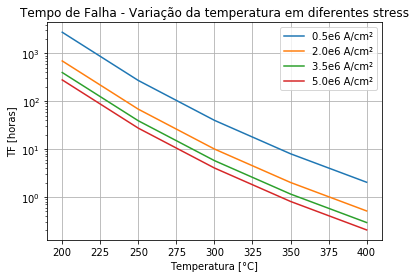

In [30]:
temperatura = [200+273, 250+273, 300+273, 350+273, 400+273]
temperaturaC = [200, 250, 300, 350, 400]

# ----- Plot    
plt.plot(temperaturaC,TF_PL.Find_TF(0.5e6,temperatura),
         temperaturaC,TF_PL.Find_TF(2e6,temperatura), 
         temperaturaC,TF_PL.Find_TF(3.5e6,temperatura), 
         temperaturaC,TF_PL.Find_TF(5e6,temperatura))
plt.title('Tempo de Falha - Variação da temperatura em diferentes stress')
plt.legend(['0.5e6 A/cm²','2.0e6 A/cm²','3.5e6 A/cm²','5.0e6 A/cm²'])
plt.xlabel('Temperatura [°C]')
plt.ylabel('TF [horas]')
plt.yscale('log')
plt.grid()
fig = plt.gcf()
plt.show()

---
##### Variáveis Associadas

In [24]:
print(TF_PL.Variables())

-----
Linear Fit Variables - Power Law

Finding N exponent
a (slope coef) = -0.995949005002
b (intercept coef) = 16.7545193116
Correlation coefficient = -0.999994729551
Standard error = 0.00323353533106

Finding Activation Energy (Q)
a (slope coef) = 11483.9698115
b (intercept coef) = -17.7505818683
Correlation coefficient = 0.999901799692
Standard error = 160.951656993


-----
Time to Failure Variables - Power Law
n = 0.995949005002
Q = 9.89573678658 [eV]
Ao = 0.0373540918141


